###  🇬🇧 Mean Shift Clustering: Explanation and Use Case

**Mean Shift** is a non-parametric clustering algorithm that shifts data points towards the modes (peaks in the density distribution) of the data. It's particularly useful for finding arbitrary shaped clusters and doesn't require specifying the number of clusters beforehand.

**Importance for Simulations**: Mean Shift is important for simulations because it can help identify natural groupings or densities within simulated data without making assumptions about the number or shape of these groups. This is valuable for understanding the underlying structure of the simulation results.

**Use Case**: A direct use case for Mean Shift clustering is in analyzing spatial data to find areas of high density, such as identifying urban centers from population data, or locating hotspots of activity in simulations.

---

### 🇧🇷Algoritmo Mean Shift: Explicação e Caso de Uso 🇧🇷 🇬🇧

O **Mean Shift** é um algoritmo de agrupamento não paramétrico que move os pontos de dados em direção aos modos (picos na distribuição de densidade) dos dados. É particularmente útil para encontrar clusters de formas arbitrárias e não requer que o número de clusters seja especificado antecipadamente.

**Importância para Simulações**: O Mean Shift é importante para simulações porque pode ajudar a identificar agrupamentos naturais ou densidades em dados simulados sem fazer suposições sobre o número ou a forma desses grupos. Isso é valioso para entender a estrutura subjacente dos resultados da simulação.

**Caso de Uso**: Um caso de uso direto para o agrupamento Mean Shift é na análise de dados espaciais para encontrar áreas de alta densidade, como identificar centros urbanos a partir de dados populacionais, ou localizar pontos de concentração de atividade em simulações.

In [ ]:
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore') #  Ignore Avisos Referentes a Update do Python

### Dataset Generation Explained 🇧🇷 🇬🇧

The code in the cell `YcjELFvvviy6` uses the `make_blobs` function from the `sklearn.datasets` library to create a synthetic dataset for clustering. Here's a breakdown of the parameters used:

*   **`n_samples = 500`**: This specifies the total number of data points to generate. In this case, you asked for 500 data points.
*   **`centers = 5`**: This determines the number of centers or clusters to generate. You specified that you wanted 5 centers, resulting in 5 distinct blobs of data.
*   **`cluster_std = 1`**: This sets the standard deviation of the clusters. A smaller value means the data points within each cluster will be closer together. You set it to 1.
*   **`random_state = 27`**: This is a seed for the random number generator. Using a fixed `random_state` ensures that the generated dataset is the same each time you run the code, making your results reproducible. You used the value 27.

In summary, you have generated a dataset `X` with 500 data points, forming 5 clusters with a standard deviation of 1, using a random seed of 27. This data is then converted into a pandas DataFrame `X1` with columns named 'C1' and 'C2'.

---

### Explicação da Geração do Dataset 🇧🇷 🇬🇧

O código na célula `YcjELFvvviy6` usa a função `make_blobs` da biblioteca `sklearn.datasets` para criar um dataset sintético para agrupamento (clustering). Aqui está uma explicação dos parâmetros utilizados:

*   **`n_samples = 500`**: Isso especifica o número total de pontos de dados a serem gerados. Neste caso, você solicitou 500 pontos de dados.
*   **`centers = 5`**: Isso determina o número de centros ou clusters a serem gerados. Você especificou que queria 5 centros, resultando em 5 blocos distintos de dados.
*   **`cluster_std = 1`**: Isso define o desvio padrão dos clusters. Um valor menor significa que os pontos de dados dentro de cada cluster ficarão mais próximos. Você definiu como 1.
*   **`random_state = 27`**: Esta é uma semente para o gerador de números aleatórios. Usar um `random_state` fixo garante que o dataset gerado seja o mesmo a cada vez que você executar o código, tornando seus resultados reproduzíveis. Você usou o valor 27.

Em resumo, você gerou um dataset `X` com 500 pontos de dados, formando 5 clusters com um desvio padrão de 1, usando uma semente aleatória de 27. Esses dados são então convertidos em um DataFrame pandas `X1` com as colunas nomeadas 'C1' e 'C2'.

In [ ]:
# Cria um dataset aleatorio
X,Y = make_blobs(n_samples = 500, centers = 5, cluster_std = 0.6, random_state = 27)
X1 = pd.DataFrame(X)
X1.columns = ['C1', 'C2']

In [ ]:
# Estima a largura de  banda usando a funcao estimate_bandwisth()
tam_banda = estimate_bandwidth(X1, quantile = 0.2, n_samples=500)
float(tam_banda)

2.2578461954474554

### Importance of Bandwidth in Mean Shift 🇧🇷 🇬🇧

The `tam_banda` (bandwidth) parameter is crucial in the Mean Shift clustering algorithm. It determines the size of the neighborhood around each data point that is considered when shifting towards a denser area.

*   **Larger bandwidth**: A larger bandwidth considers more data points in the neighborhood, leading to fewer but larger clusters. This can result in over-smoothing and merging of distinct clusters. 🤝
*   **Smaller bandwidth**: A smaller bandwidth considers fewer data points, leading to more but potentially smaller clusters. This can result in under-smoothing and splitting of clusters. ✂️

Choosing an appropriate bandwidth is important for obtaining meaningful clustering results. The `estimate_bandwidth` function used in cell `MscWiBqaxlf4` helps in automatically estimating a suitable bandwidth based on the data. 🧠

---

### Importância da Largura de Banda (Bandwidth) no Mean Shift 🇧🇷 🇬🇧

O parâmetro `tam_banda` (largura de banda) é crucial no algoritmo de agrupamento Mean Shift. Ele determina o tamanho da vizinhança ao redor de cada ponto de dados que é considerada ao se mover em direção a uma área mais densa.

*   **Largura de banda maior**: Uma largura de banda maior considera mais pontos de dados na vizinhança, levando a menos clusters, mas maiores. Isso pode resultar em suavização excessiva e fusão de clusters distintos. 🤝
*   **Largura de banda menor**: Uma largura de banda menor considera menos pontos de dados, levando a mais clusters, mas potencialmente menores. Isso pode resultar em suavização insuficiente e divisão de clusters. ✂️

A escolha de uma largura de banda apropriada é importante para obter resultados de agrupamento significativos. A função `estimate_bandwidth` usada na célula `MscWiBqaxlf4` ajuda a estimar automaticamente uma largura de banda adequada com base nos dados. 🧠

In [ ]:
# Desempenho do MeanShift
model = MeanShift(bandwidth = tam_banda, bin_seeding = True)
model.fit(X1)
labels = model.labels_
centers = model.cluster_centers_

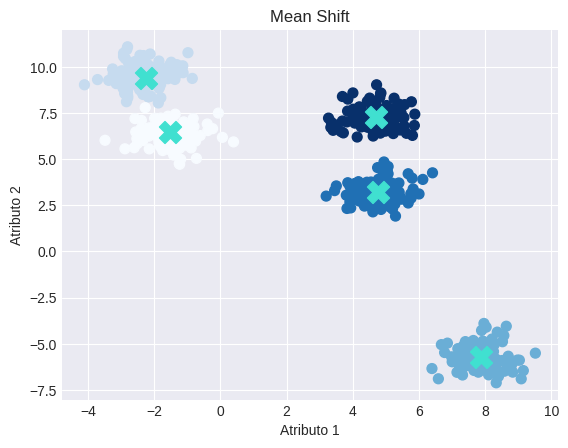

In [ ]:
# Plots os Resultados
plt.style.use('seaborn-v0_8-darkgrid') # Use a darkgrid style for dark mode
plt.scatter(X1['C1'], X1['C2'], c = labels, cmap = 'Blues', vmin=min(labels), vmax=max(labels), s=50) # Use 'Blues' colormap for blue tones
plt.scatter(centers[:,0], centers[:,1], c = 'turquoise', s = 250, marker='X') # Change center color to turquoise
plt.title('Mean Shift')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.show()

### 🇬🇧 Plotting the Mean Shift Results

The code in cell `SggIVTsXzZKm` visualizes the results of the Mean Shift clustering performed on the generated dataset. Here's a breakdown:

*   **`plt.style.use('seaborn-v0_8-darkgrid')`**: This line sets the plotting style to 'seaborn-v0_8-darkgrid', which provides a dark background and grid lines, suitable for dark mode.
*   **`plt.scatter(X1['C1'], X1['C2'], c = labels, cmap = 'winter')`**: This creates a scatter plot of the data points.
    *   `X1['C1']` and `X1['C2']` are the x and y coordinates of the data points from the DataFrame `X1`.
    *   `c = labels` colors each data point according to the cluster it was assigned to by the Mean Shift algorithm (`labels` is the array of cluster labels returned by the `model.labels_`).
    *   `cmap = 'winter'` specifies the colormap to use for coloring the clusters, in this case, a colormap with turquoise tones.
*   **`plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 250, marker='X')`**: This adds the cluster centers to the scatter plot.
    *   `centers[:,0]` and `centers[:,1]` are the x and y coordinates of the cluster centers obtained from `model.cluster_centers_`.
    *   `c = 'black'` sets the color of the cluster center markers to black.
    *   `s = 250` sets the size of the markers.
    *   `marker='X'` sets the marker style to an 'X'.
*   **`plt.title('Mean Shift')`**: This sets the title of the plot to 'Mean Shift'.
*   **`plt.xlabel('Atributo 1')`**: This sets the label for the x-axis to 'Atributo 1'.
*   **`plt.ylabel('Atributo 2')`**: This sets the label for the y-axis to 'Atributo 2'.
*   **`plt.show()`**: This displays the generated plot.

---

### 🇧🇷  Plotagem dos Resultados do Mean Shift 🇧🇷 🇬🇧

O código na célula `SggIVTsXzZKm` visualiza os resultados do agrupamento Mean Shift realizado no dataset gerado. Aqui está uma explicação detalhada:

*   **`plt.style.use('seaborn-v0_8-darkgrid')`**: Esta linha define o estilo de plotagem para 'seaborn-v0_8-darkgrid', que fornece um fundo escuro e linhas de grade, adequado para o modo escuro.
*   **`plt.scatter(X1['C1'], X1['C2'], c = labels, cmap = 'winter')`**: Isso cria um gráfico de dispersão dos pontos de dados.
    *   `X1['C1']` e `X1['C2']` são as coordenadas x e y dos pontos de dados do DataFrame `X1`.
    *   `c = labels` colore cada ponto de dados de acordo com o cluster ao qual foi atribuído pelo algoritmo Mean Shift (`labels` é o array de rótulos de cluster retornado por `model.labels_`).
    *   `cmap = 'winter'` especifica o mapa de cores a ser usado para colorir os clusters, neste caso, um mapa de cores com tons de turquesa.
*   **`plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 250, marker='X')`**: Isso adiciona os centros dos clusters ao gráfico de dispersão.
    *   `centers[:,0]` e `centers[:,1]` são as coordenadas x e y dos centros dos clusters obtidos de `model.cluster_centers_`.
    *   `c = 'black'` define a cor dos marcadores dos centros dos clusters como preto.
    *   `s = 250` define o tamanho dos marcadores.
    *   `marker='X'` define o estilo do marcador como um 'X'.
*   **`plt.title('Mean Shift')`**: Define o título do gráfico como 'Mean Shift'.
*   **`plt.xlabel('Atributo 1')`**: Define o rótulo para o eixo x como 'Atributo 1'.
*   **`plt.ylabel('Atributo 2')`**: Define o rótulo para o eixo y como 'Atributo 2'.
*   **`plt.show()`**: Exibe o gráfico gerado.